In [66]:
import numpy as np
import pandas as pd
from IPython import display
import time
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

In [6]:
dataset=pd.read_csv('/home/ashwin/Downloads/ADRvsRating.csv')
data=dataset.as_matrix()
newInstance=data.shape[0]
newInstance

1000

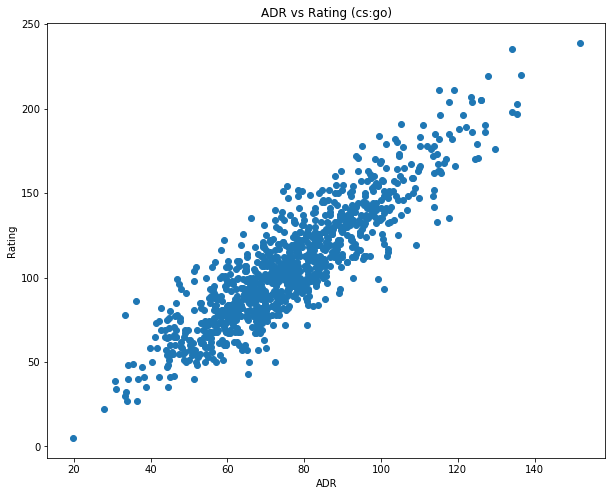

In [9]:
plt.figure(figsize=(10,8))
plt.title('ADR vs Rating (cs:go)')
plt.scatter(x=data[:,0],y=data[:,1])
plt.xlabel('ADR')
plt.ylabel('Rating')
plt.show()

In [39]:
def SSE(m,b,datasent):
    totalError=0.0
    for i in range(newInstance):
        adr=datasent[i,0]
        currentTarget=datasent[i,1]
        currentOutput=m*adr+b
        totalError+=(currentOutput-currentTarget)**2
    sse=totalError/newInstance
    return totalError

In [33]:
m=2
b=3
sse=SSE(m,b,data)
print sse

2644260.84


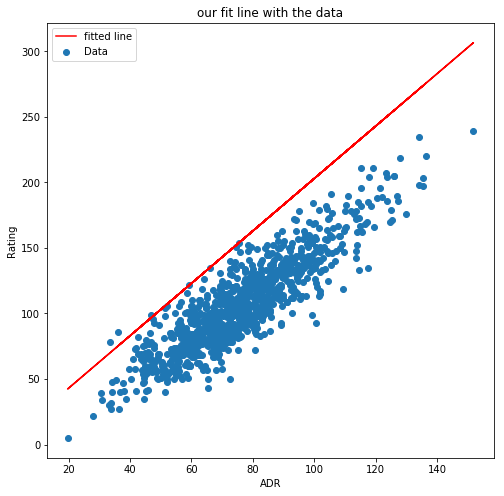

In [34]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111)
ax.set_title("our fit line with the data")
ax.scatter(x=data[:,0],y=data[:,1],label='Data')
plt.plot(data[:,0],m*data[:,0]+b,color='red',label='fitted line')
ax.set_xlabel('ADR')
ax.set_ylabel('Rating')
ax.legend(loc='best')
plt.show()

In [73]:
def gradint_desent(m,b,data):
    m_grad=0
    b_grad=0
    N=newInstance
    for i in range(N):
        x=data[i,0]
        y=data[i,1]
        dm=-((2/N)*x*(y-(m*x+b)))
        db=-((2/N)*(y-(m*x+b)))
        m_grad=m_grad+dm
        b_grad=b_grad+db
    m_updated = m - 0.0001*m_grad
    b_updated = b - 0.0001*b_grad
    return m_updated,b_updated

In [74]:
m=2.0
b=3.0
sse=SSE(m,b,data)
print sse
for i in range(2):
    m,b=gradint_desent(m,b,data)
    sse=SSE(m,b,data)
    print sse

2644260.84
392986.892656
280130.022048


In [78]:
def gradient_desent_n_step(n_steps,m_starting_point,b_starting_point,datasent):
    display=n_steps//10
    m=m_starting_point
    b=b_starting_point
    for i in range(n_steps):
        m,b=gradint_desent(m,b,data)
        if(i%display==0):
            sse=SSE(m,b,data)
            sse
    print ('\nBest  line: y = %.6fx + %.6f - Error: %.6f' %(m,b,sse))
    return m,b

In [79]:
M_STARTING = 0
B_STARTING = 0
NUM_STEPS = 1000
m_best,b_best = gradient_desent_n_step(NUM_STEPS,M_STARTING,B_STARTING,data)


Best  line: y = 1.416873x + -0.165913 - Error: 267856.135939


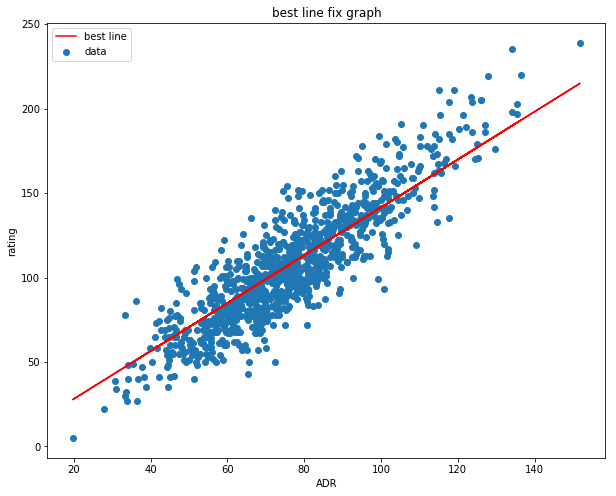

In [81]:
m=m_best
b=b_best
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
ax.set_title("best line fix graph")
ax.scatter(x=data[:,0],y=data[:,1],label='data')
ax.plot(data[:,0],m*data[:,0]+b,color='red',label='best line')
ax.set_xlabel('ADR')
ax.set_ylabel('rating')
ax.legend(loc='best')
plt.show()